### Libaries to be Imported 

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import warnings

warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier

In [113]:
wine = pd.read_csv("winequality-red 2.csv")

In [115]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


##### Data analysis and Understanding

In [118]:
wine.shape

(1599, 12)

In [120]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [122]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [124]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [126]:
#Code to be able to remove highly correlate 
corr_matrix = wine.corr().abs()
# upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# # Find index pairs where correlation is greater than 0.8
# to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

# # Drop these columns from the dataframe
# df_reduced = df.drop(columns=to_drop)

# # Display the reduced dataframe
# print(df_reduced)

<Axes: >

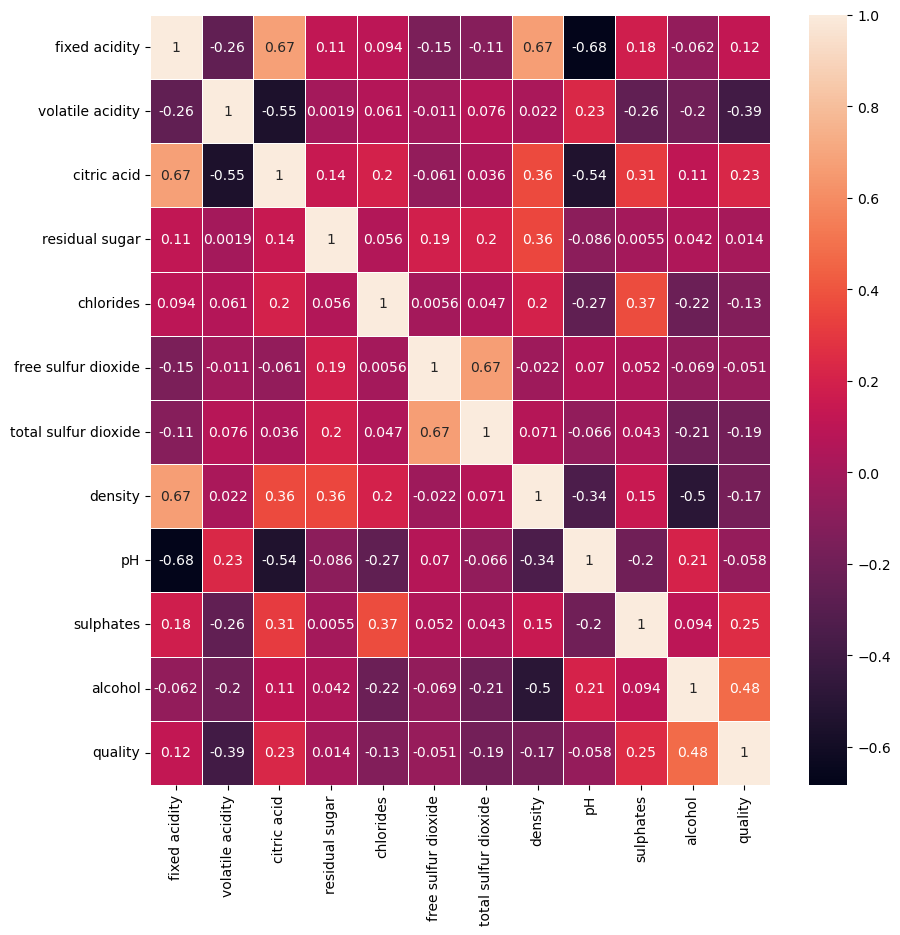

In [128]:
f, axis = plt.subplots(figsize=(10, 10))
sns.heatmap(wine.corr(), annot= True, linewidths = 0.5,ax = axis)

### Graphical representation of the data 

In [131]:
column = wine.columns.tolist()
print(column)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


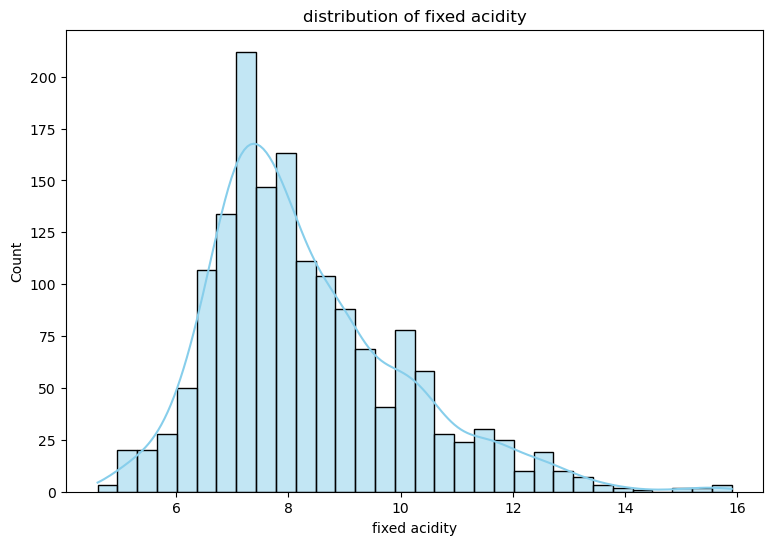

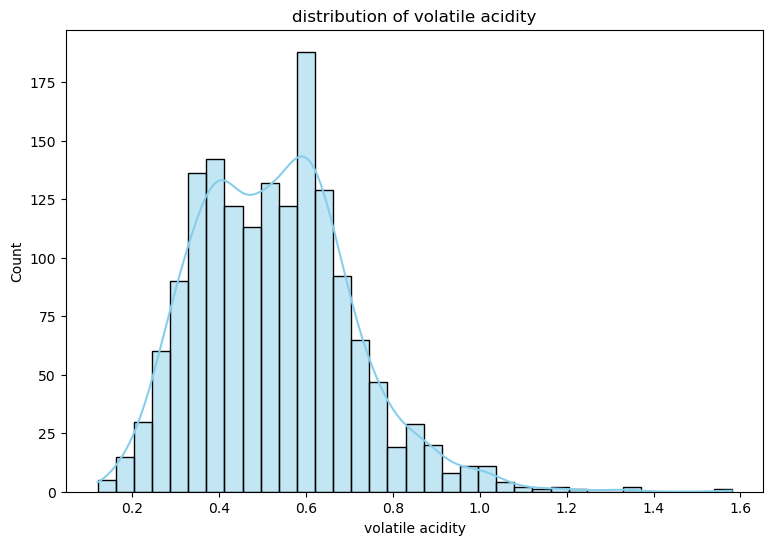

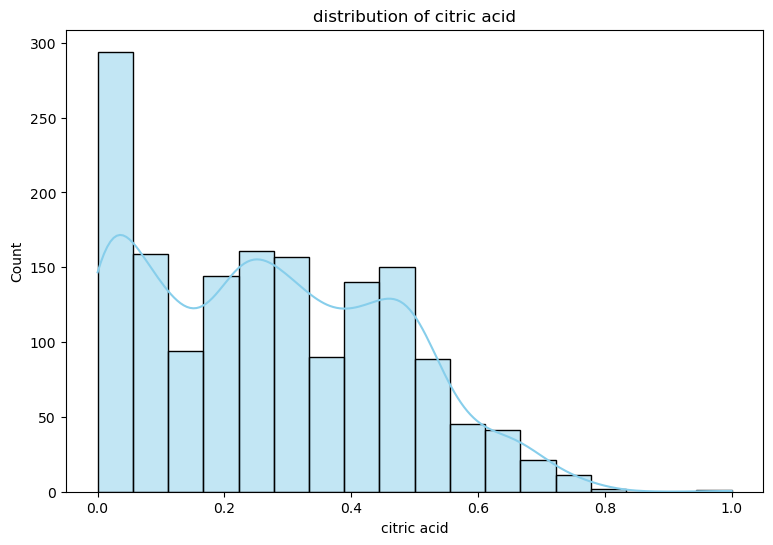

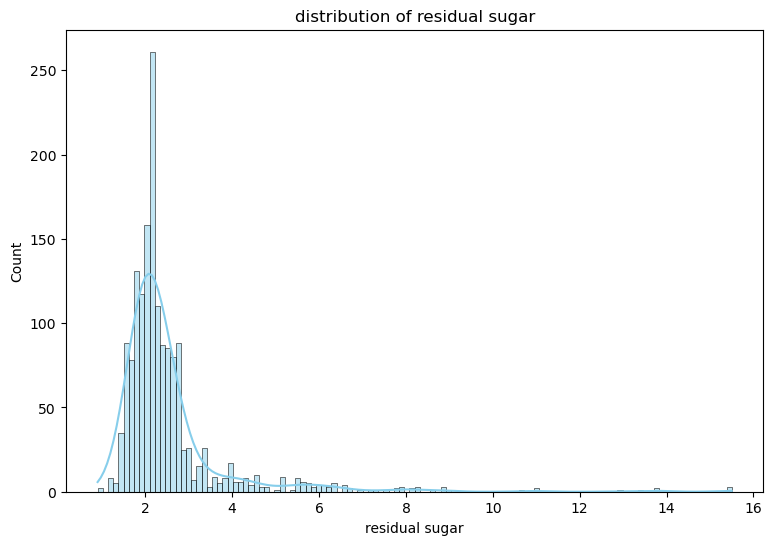

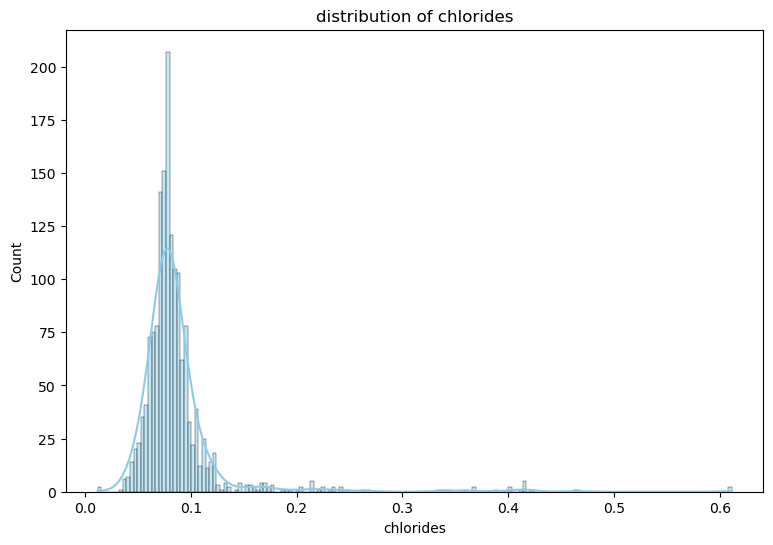

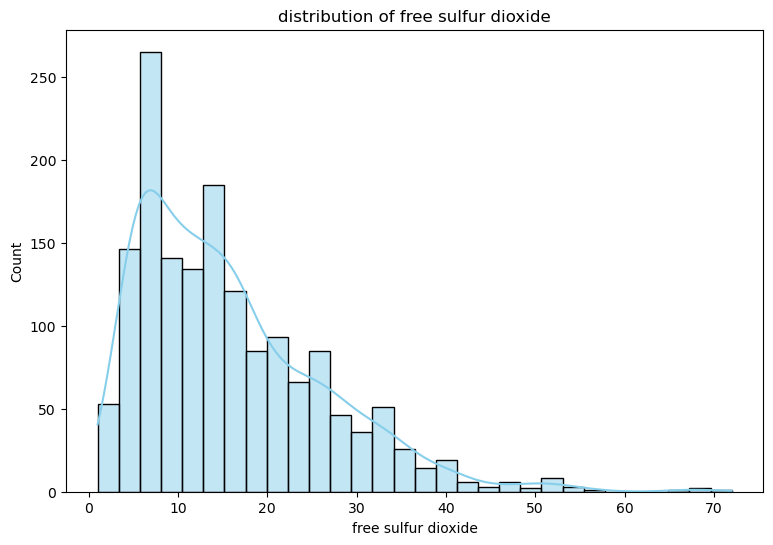

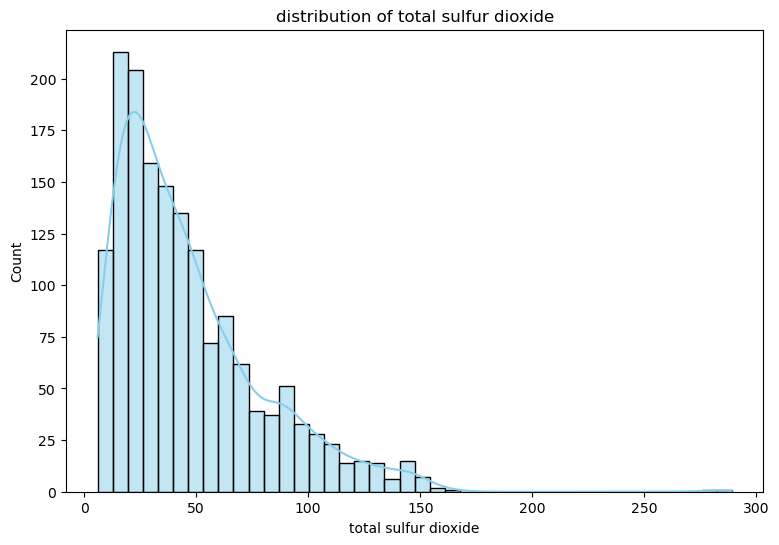

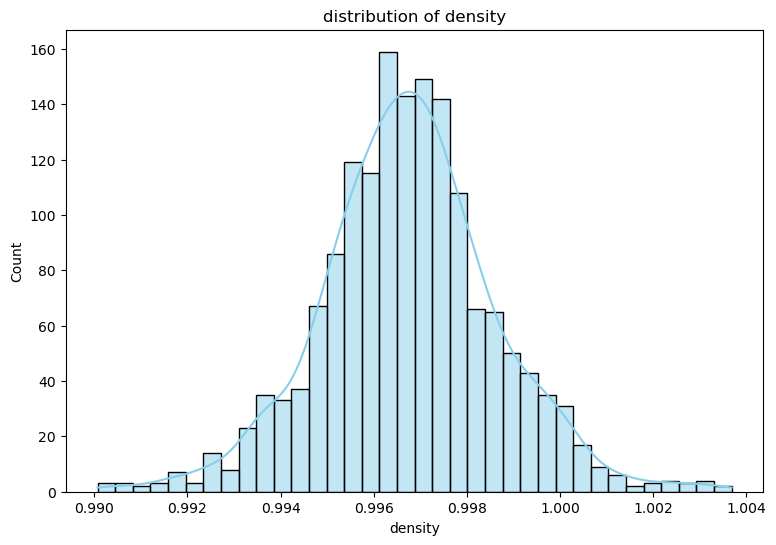

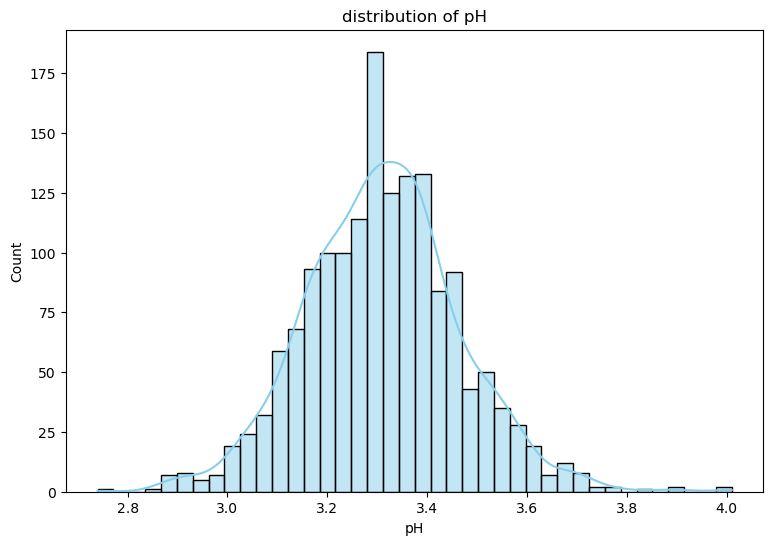

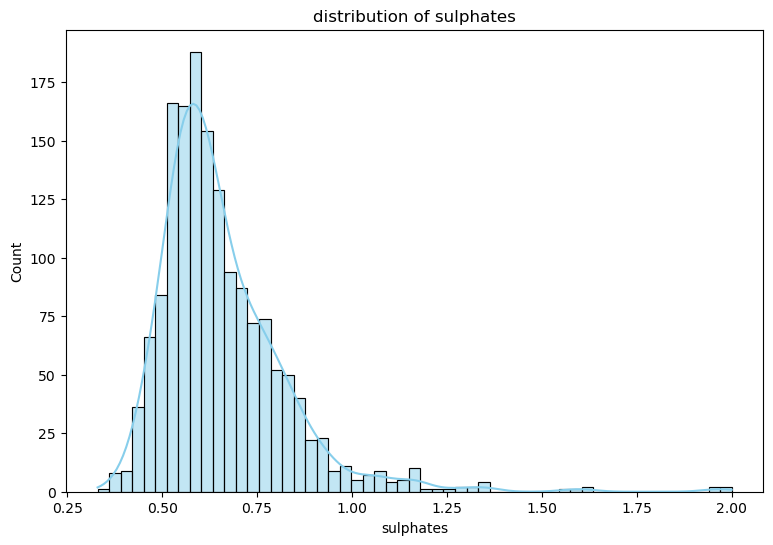

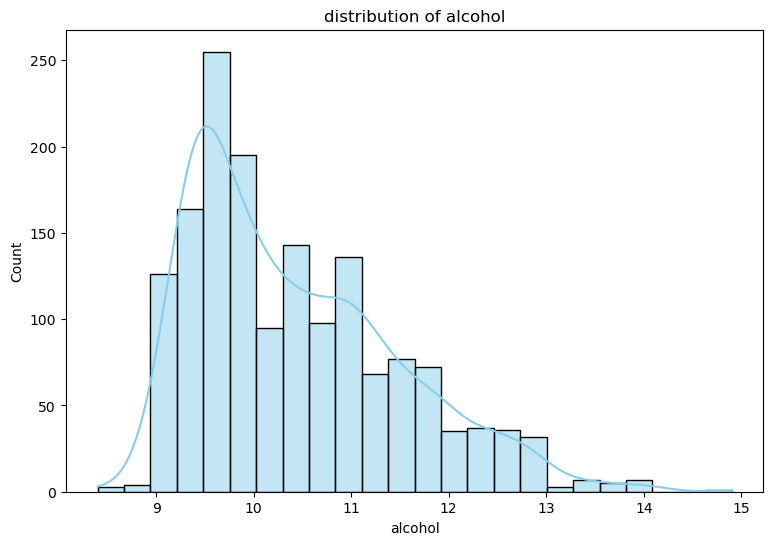

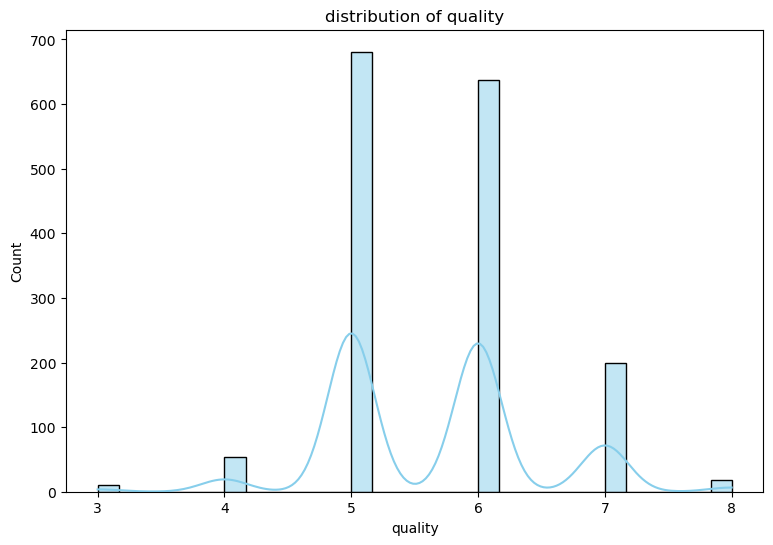

In [133]:
for column in wine:
    plt.figure(figsize=(9,6))
    sns.histplot(data = wine,x = column, kde= True, color = 'skyblue')
    plt.title(f'distribution of {column}')
    plt.show()

#### Analysis of the quality

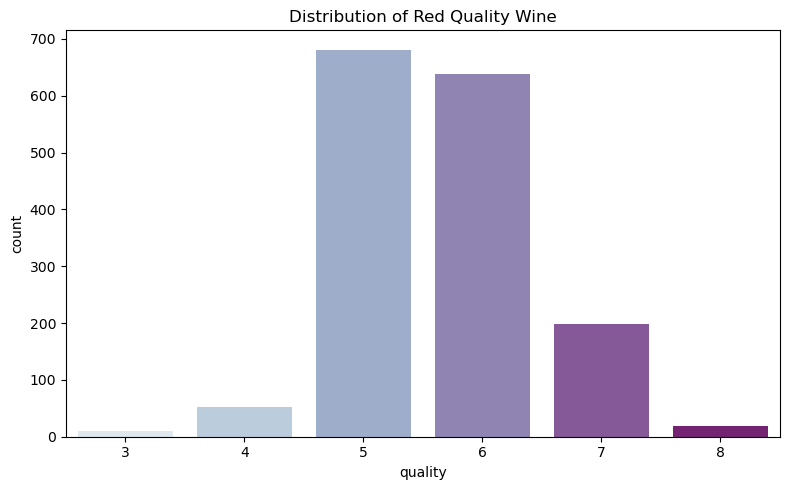

In [136]:
labels = ["3", "4", "5", "6", "7", "8"]
ticks = range(len(labels))

fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=wine, x='quality', ax=ax, palette=sns.color_palette("BuPu"))
ax.set_title('Distribution of Red Quality Wine')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


In [208]:
wine = wine[wine['quality'].isin([5, 6, 7])]

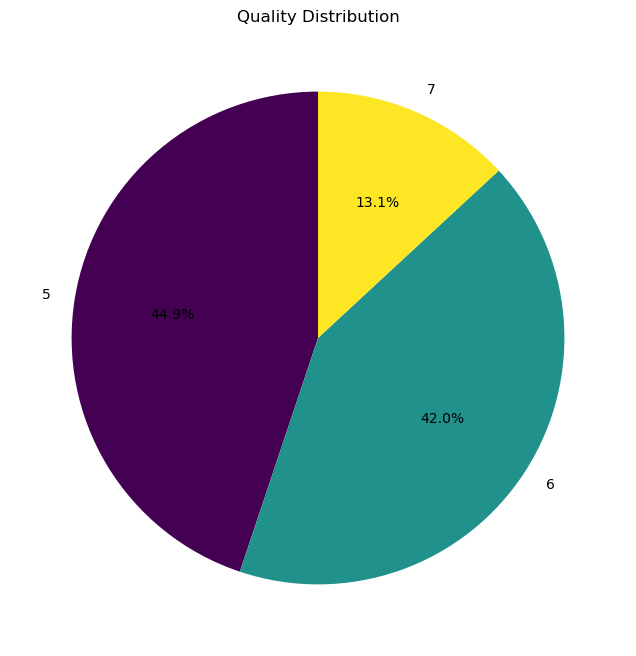

In [210]:
quality_counts = wine['quality'].value_counts()

plt.figure(figsize=(12,8))
quality_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Quality Distribution')
plt.ylabel('')  #
plt.show()


In [213]:
X = wine.drop(columns=["quality","fixed acidity"])
y = wine["quality"]

original_columns = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Get feature importances from the model
importance_1 = model.feature_importances_
importances = sorted(zip(original_columns, importance_1), key=lambda x: x[1], reverse=True)

# Calculate the corr matrix
corr_matrix = pd.DataFrame(X_train, columns=original_columns).corr().abs()

# Select the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Threshold for high correlation
high_corr_threshold = 0.66

# Find index of feature columns with corr > threshold
to_drop = [column for column in upper.columns if any(upper[column] > high_corr_threshold)]

# Filter based on feature importance
importance_threshold = 0.05
important_features = [name for name, importance in importances if importance > importance_threshold]
final_features = [feature for feature in important_features if feature not in to_drop]

# Use the final_features to filter the original dataset
X_reduced = wine[final_features]

# Split the reduced data
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, wine["quality"], test_size=0.2, random_state=42)

# Scale the reduced data
X_train_reduced = scaler.fit_transform(X_train_reduced)
X_test_reduced = scaler.transform(X_test_reduced)

# Train the model using the reduced data
model_reduced = RandomForestClassifier(random_state=42)
model_reduced.fit(X_train_reduced, y_train_reduced)

# Predict using the reduced data
y_pred_reduced = model_reduced.predict(X_test_reduced)

In [215]:
print("Classification Report:\n", classification_report(y_test_reduced, y_pred_reduced))
print("Confusion Matrix:\n", confusion_matrix(y_test_reduced, y_pred_reduced))
print("Accuracy Score:", accuracy_score(y_test_reduced, y_pred_reduced))

Classification Report:
               precision    recall  f1-score   support

           5       0.77      0.83      0.80       135
           6       0.70      0.73      0.72       134
           7       0.83      0.43      0.57        35

    accuracy                           0.74       304
   macro avg       0.77      0.66      0.69       304
weighted avg       0.75      0.74      0.73       304

Confusion Matrix:
 [[112  23   0]
 [ 33  98   3]
 [  1  19  15]]
Accuracy Score: 0.7401315789473685


#### Feature Importance of Model

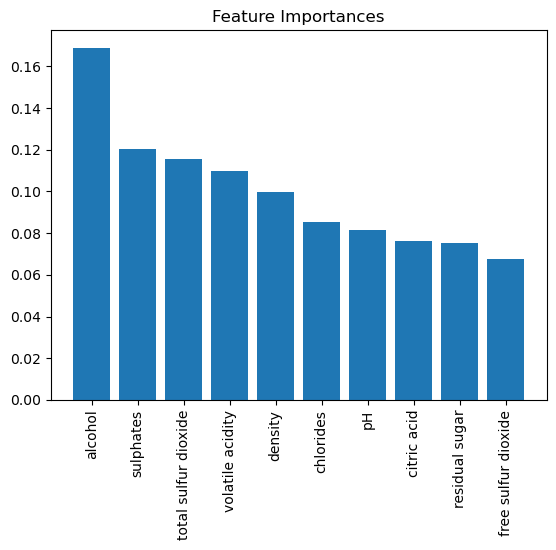

In [219]:
importances = model_reduced.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train_reduced.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_reduced.shape[1]), [final_features[i] for i in indices], rotation=90)
plt.show()

#### Using SMOTE or undersampling in order to deal with the classes with too much data ( Does not work)

In [222]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_reduced, y_train_reduced)

# Train the model with SMOTE data
model_smote = RandomForestClassifier(random_state=42)
model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = model_smote.predict(X_test_reduced)

# Evaluate performance
print("SMOTE Model Performance")
print("Accuracy:", accuracy_score(y_test_reduced, y_pred_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test_reduced, y_pred_smote))
print("Classification Report:\n", classification_report(y_test_reduced, y_pred_smote))

SMOTE Model Performance
Accuracy: 0.743421052631579
Confusion Matrix:
 [[109  24   2]
 [ 30  95   9]
 [  2  11  22]]
Classification Report:
               precision    recall  f1-score   support

           5       0.77      0.81      0.79       135
           6       0.73      0.71      0.72       134
           7       0.67      0.63      0.65        35

    accuracy                           0.74       304
   macro avg       0.72      0.71      0.72       304
weighted avg       0.74      0.74      0.74       304



In [224]:
undersample = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersample.fit_resample(X_train_reduced, y_train_reduced)

# Train the model with undersampled data
model_under = RandomForestClassifier(random_state=42)
model_under.fit(X_train_under, y_train_under)
y_pred_under = model_under.predict(X_test_reduced)

# Evaluate performance
print("Undersampled Model Performance")
print("Accuracy:", accuracy_score(y_test_reduced, y_pred_under))
print("Confusion Matrix:\n", confusion_matrix(y_test_reduced, y_pred_under))
print("Classification Report:\n", classification_report(y_test_reduced, y_pred_under))

Undersampled Model Performance
Accuracy: 0.6480263157894737
Confusion Matrix:
 [[103  27   5]
 [ 38  67  29]
 [  2   6  27]]
Classification Report:
               precision    recall  f1-score   support

           5       0.72      0.76      0.74       135
           6       0.67      0.50      0.57       134
           7       0.44      0.77      0.56        35

    accuracy                           0.65       304
   macro avg       0.61      0.68      0.63       304
weighted avg       0.67      0.65      0.65       304



In [226]:
model_weighted = RandomForestClassifier(random_state=42, class_weight='balanced')
model_weighted.fit(X_train_reduced, y_train_reduced)
y_pred_weighted = model_weighted.predict(X_test_reduced)

# Evaluate performance
print("Weighted Model Performance")
print("Accuracy:", accuracy_score(y_test_reduced, y_pred_weighted))
print("Confusion Matrix:\n", confusion_matrix(y_test_reduced, y_pred_weighted))
print("Classification Report:\n", classification_report(y_test_reduced, y_pred_weighted))


Weighted Model Performance
Accuracy: 0.7664473684210527
Confusion Matrix:
 [[113  22   0]
 [ 28 105   1]
 [  2  18  15]]
Classification Report:
               precision    recall  f1-score   support

           5       0.79      0.84      0.81       135
           6       0.72      0.78      0.75       134
           7       0.94      0.43      0.59        35

    accuracy                           0.77       304
   macro avg       0.82      0.68      0.72       304
weighted avg       0.78      0.77      0.76       304



In [228]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=model_weighted, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train_reduced, y_train_reduced)
best_random = random_search.best_estimator_

# Evaluate performance of the best model
y_pred_best_random = best_random.predict(X_test_reduced)
print("Best Random Search Model Performance")
print("Accuracy:", accuracy_score(y_test_reduced, y_pred_best_random))
print("Confusion Matrix:\n", confusion_matrix(y_test_reduced, y_pred_best_random))
print("Classification Report:\n", classification_report(y_test_reduced, y_pred_best_random))


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Random Search Model Performance
Accuracy: 0.7664473684210527
Confusion Matrix:
 [[113  22   0]
 [ 27 106   1]
 [  2  19  14]]
Classification Report:
               precision    recall  f1-score   support

           5       0.80      0.84      0.82       135
           6       0.72      0.79      0.75       134
           7       0.93      0.40      0.56        35

    accuracy                           0.77       304
   macro avg       0.82      0.68      0.71       304
weighted avg       0.78      0.77      0.76       304



#### Model using XGboost instead of RF